In [65]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from textblob import TextBlob
import warnings

In [66]:
warnings.filterwarnings('ignore')

In [67]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')
# https://brightdata.com/cp/datasets/browse/gd_lfqkr8wm13ixtbd8f5?tab=sample&camp=plg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Data Cleaning and creating a csv file

# Loading the JSON file
json_path = '/content/drive/MyDrive/ZillowListing.json'
housing_data = pd.read_json(json_path)

print(f"Total rows in JSON: {len(housing_data)}")

# Selecting the relevant columns for modeling
relevant_columns = [
    'state', 'homeStatus', 'bedrooms', 'bathrooms',
    'price', 'yearBuilt', 'lotSize',
    'propertyTaxRate',
    'description', 'propertyTypeDimension'
]

# Filtering the dataframe to keep only the relevant columns
df_relevant = housing_data[relevant_columns]

# Write the filtered data to a CSV
output_csv_path = '/content/drive/MyDrive/ZillowListing_filtered.csv'
df_relevant.to_csv(output_csv_path, index=False)

print(f"Filtered data saved to {output_csv_path}")

Total rows in JSON: 1000
Filtered data saved to /content/drive/MyDrive/ZillowListing_filtered.csv


In [69]:
# data import
housing_data = pd.read_csv('/content/drive/MyDrive/ZillowListing_filtered.csv')
housing_data.head()

,state,homeStatus,bedrooms,bathrooms,price,yearBuilt,lotSize,propertyTaxRate,description,propertyTypeDimension
0,ME,FOR_SALE,6.0,6.0,1500000,2017,164221.0,0.95,"This exceptional property, set on approximatel...",Multi Family
1,ME,FOR_SALE,6.0,3.0,740000,2024,22651.0,1.04,We are pleased to present this newly construct...,Multi Family
2,ME,FOR_SALE,5.0,4.0,999000,2017,105850.0,0.97,"Welcome to 51 Delta Drive, a stunning 4001 sq....",Multi Family
3,ME,FOR_SALE,4.0,2.0,379999,2021,31363.0,1.22,This duplex is truly one of a kind. Built to ...,Multi Family
4,ME,FOR_SALE,4.0,2.0,399900,2017,8712.0,1.04,"Welcome to 15 Murray st, a beautifully appoint...",Multi Family


In [70]:
#check out textblob library or spacy or vader
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1000 non-null   object 
 1   homeStatus             1000 non-null   object 
 2   bedrooms               816 non-null    float64
 3   bathrooms              886 non-null    float64
 4   price                  1000 non-null   int64  
 5   yearBuilt              1000 non-null   int64  
 6   lotSize                777 non-null    float64
 7   propertyTaxRate        1000 non-null   float64
 8   description            990 non-null    object 
 9   propertyTypeDimension  1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [71]:
# Droping the null values and the values for which price =0
housing_data = housing_data.dropna()
housing_data = housing_data[housing_data['price'] != 0]


In [72]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  591 non-null    object 
 1   homeStatus             591 non-null    object 
 2   bedrooms               591 non-null    float64
 3   bathrooms              591 non-null    float64
 4   price                  591 non-null    int64  
 5   yearBuilt              591 non-null    int64  
 6   lotSize                591 non-null    float64
 7   propertyTaxRate        591 non-null    float64
 8   description            591 non-null    object 
 9   propertyTypeDimension  591 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 50.8+ KB


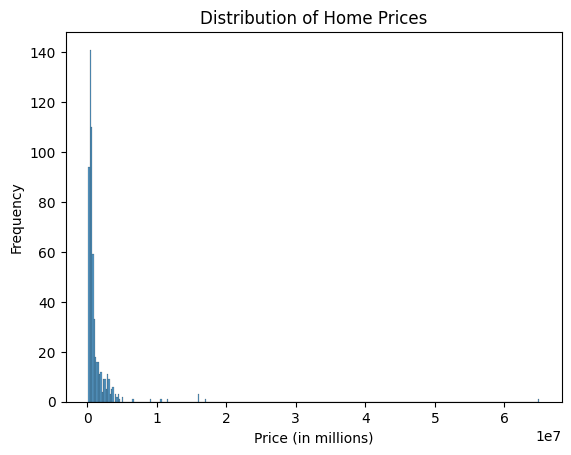

In [73]:
# histogram of prices
sns.histplot(data = housing_data, x = 'price')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Home Prices');

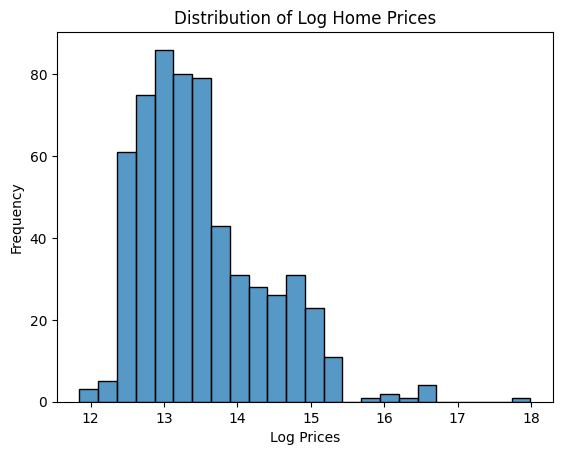

In [80]:
# taking the log of prices and drawing a histogram of it
housing_data['LogPrice'] = np.log(housing_data['price'])
sns.histplot(data = housing_data, x = 'LogPrice')
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Log Home Prices');

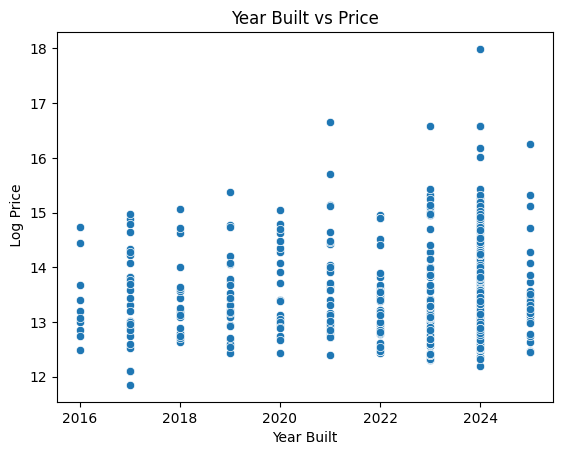

In [81]:
#plotting yearbuilt against price
sns.scatterplot(data = housing_data, x = 'yearBuilt', y = 'LogPrice')
plt.xlabel('Year Built')
plt.ylabel(' Log Price')
plt.title('Year Built vs Price');

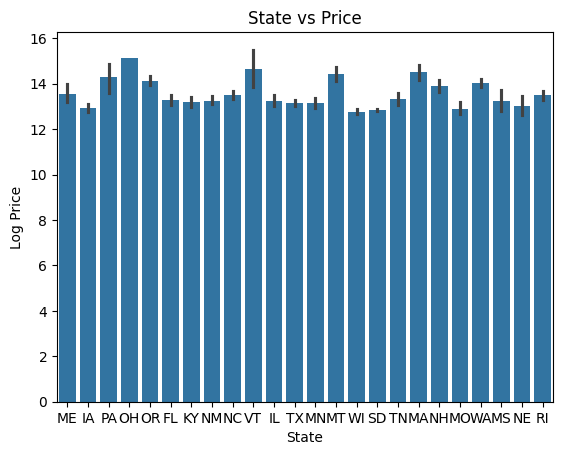

In [83]:
# plotting states agains prices
sns.barplot(data = housing_data, x = 'state', y = 'LogPrice')
plt.xlabel('State')
plt.ylabel('Log Price')
plt.title('State vs Price');

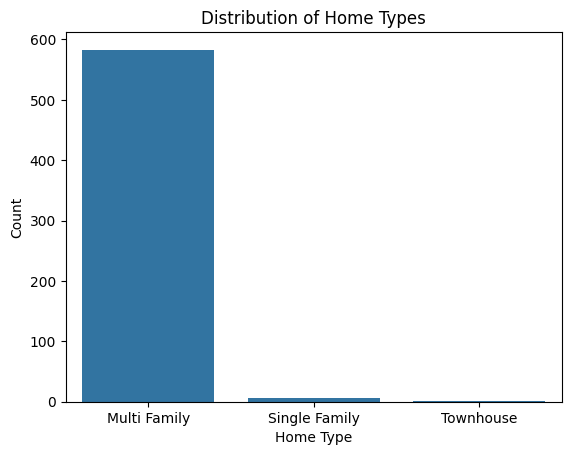

propertyTypeDimension
Multi Family     583
Single Family      6
Townhouse          2
Name: count, dtype: int64


In [90]:
sns.countplot(data=housing_data, x='propertyTypeDimension')
plt.title('Distribution of Home Types')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.show();

print(housing_data['propertyTypeDimension'].value_counts())

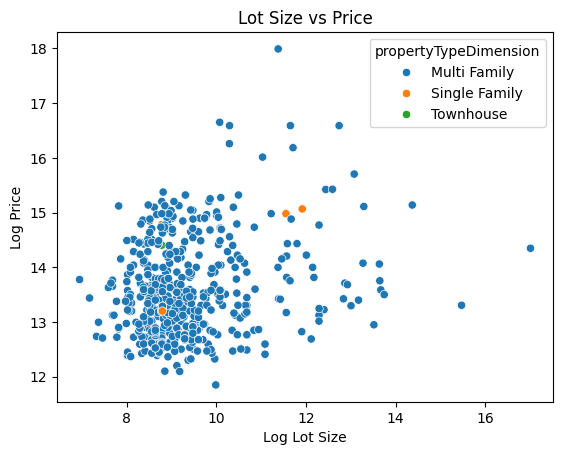

In [93]:
# lot size vs price with hue = propertyTypeDimension
sns.scatterplot(data = housing_data, x = np.log(housing_data['lotSize']), y = 'LogPrice', hue = 'propertyTypeDimension')
plt.xlabel('Log Lot Size')
plt.ylabel('Log Price')
plt.title('Lot Size vs Price');

In [94]:
np.ones(128)*housing_data['LogPrice'].mean()

array([13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51272127,
       13.51272127, 13.51272127, 13.51272127, 13.51272127, 13.51

In [95]:
# setting up baseline model using mean price and calculating the baseline mse
y = housing_data['LogPrice']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

0.7211651456068225

In [17]:
housing_data.head()

,state,homeStatus,bedrooms,bathrooms,price,yearBuilt,lotSize,propertyTaxRate,description,propertyTypeDimension,LogPrice
0,ME,FOR_SALE,6.0,6.0,1500000,2017,164221.0,0.95,"This exceptional property, set on approximatel...",Multi Family,14.220976
1,ME,FOR_SALE,6.0,3.0,740000,2024,22651.0,1.04,We are pleased to present this newly construct...,Multi Family,13.514405
2,ME,FOR_SALE,5.0,4.0,999000,2017,105850.0,0.97,"Welcome to 51 Delta Drive, a stunning 4001 sq....",Multi Family,13.814510
3,ME,FOR_SALE,4.0,2.0,379999,2021,31363.0,1.22,This duplex is truly one of a kind. Built to ...,Multi Family,12.847924
4,ME,FOR_SALE,4.0,2.0,399900,2017,8712.0,1.04,"Welcome to 15 Murray st, a beautifully appoint...",Multi Family,12.898970


In [96]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  591 non-null    object 
 1   homeStatus             591 non-null    object 
 2   bedrooms               591 non-null    float64
 3   bathrooms              591 non-null    float64
 4   price                  591 non-null    int64  
 5   yearBuilt              591 non-null    int64  
 6   lotSize                591 non-null    float64
 7   propertyTaxRate        591 non-null    float64
 8   description            591 non-null    object 
 9   propertyTypeDimension  591 non-null    object 
 10  LogPrice               591 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 55.4+ KB


In [98]:
# creating x and y, splitting intro train and test
X = housing_data[['state', 'bedrooms','bathrooms','yearBuilt', 'lotSize','propertyTaxRate','propertyTypeDimension']]
y = housing_data['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [99]:
#encode categorical column
cat_col = ['state', 'propertyTypeDimension']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [100]:
# linear regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [101]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['state',
                                                   'propertyTypeDimension'])])),
                ('model', LinearRegression())])

In [102]:
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__state_IA,-1.319610e-01
onehotencoder__state_IL,9.207009e-02
onehotencoder__state_KY,-2.019194e-01
onehotencoder__state_MA,1.151158e+00
onehotencoder__state_ME,3.586523e-01
onehotencoder__state_MN,-1.049299e-01
onehotencoder__state_MO,-4.971509e-01
onehotencoder__state_MS,-1.203517e-01
onehotencoder__state_MT,1.003626e+00
onehotencoder__state_NC,8.691771e-02


In [103]:
lr.intercept_

-33.21361167928903

In [104]:
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.39310060395542645

In [105]:
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.3024222137049051

In [108]:
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
state,0.636021
bedrooms,0.026671
bathrooms,0.142898
yearBuilt,0.016320
lotSize,0.000500
propertyTaxRate,0.016258
propertyTypeDimension,0.023247


The MSE for both train and test is less than the baseline model. Hence, the linear regression model is better.

# K nearest Neighbor Regression Model

In [109]:
# Creating x, y, and train test
X = housing_data[['state', 'bedrooms','bathrooms','yearBuilt', 'lotSize','propertyTaxRate','propertyTypeDimension']]
y = housing_data['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [110]:
# encoding categorical columns and scaling the data
cat_col = ['state', 'propertyTypeDimension']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())

In [111]:
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [112]:
paramgrid = {'model__n_neighbors': [5, 10, 15, 20, 25]}

In [113]:
grid = GridSearchCV(pipe, paramgrid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['state',
                                                                          'propertyTypeDimension'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [114]:
grid.best_params_

{'model__n_neighbors': 5}

In [115]:
knn = grid.best_estimator_

In [116]:
# mse for train data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.24762594977115043

In [118]:
# mse for test data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.20857105105266657

In [119]:
# feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
state,0.499457
bedrooms,0.189411
bathrooms,0.171521
yearBuilt,0.084663
lotSize,0.002818
propertyTaxRate,0.127045
propertyTypeDimension,-0.004946


# Decision Tree model

In [120]:
X = housing_data[['state', 'bedrooms','bathrooms','yearBuilt', 'lotSize','propertyTaxRate','propertyTypeDimension']]
y = housing_data['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
cat_col = ['state', 'propertyTypeDimension']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

x_train_encoded = transformer.fit_transform(X_train)
x_test_encoded = transformer.transform(X_test)

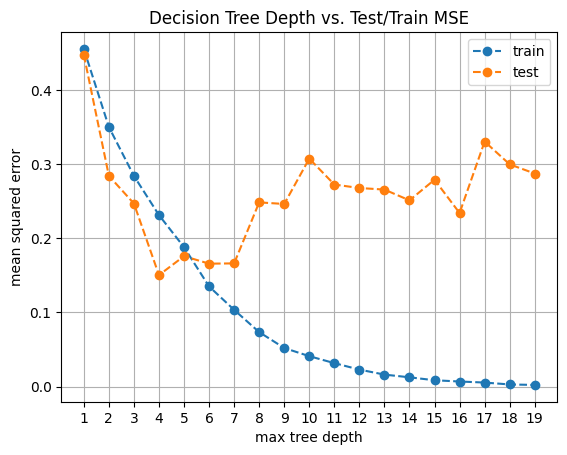

In [121]:
#find the optimal max depth while avoiding overfitting by plotting the test accuracies & finding the minimum one
train_scores = []
test_scores = []

for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth = i)
    dt.fit(x_train_encoded, y_train)
    y_train_preds = dt.predict(x_train_encoded)
    y_test_preds = dt.predict(x_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))


plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores,'--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train MSE');

In [122]:
# choosing the tree with 4/5 depth
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(x_train_encoded, y_train)

DecisionTreeRegressor(max_depth=4)

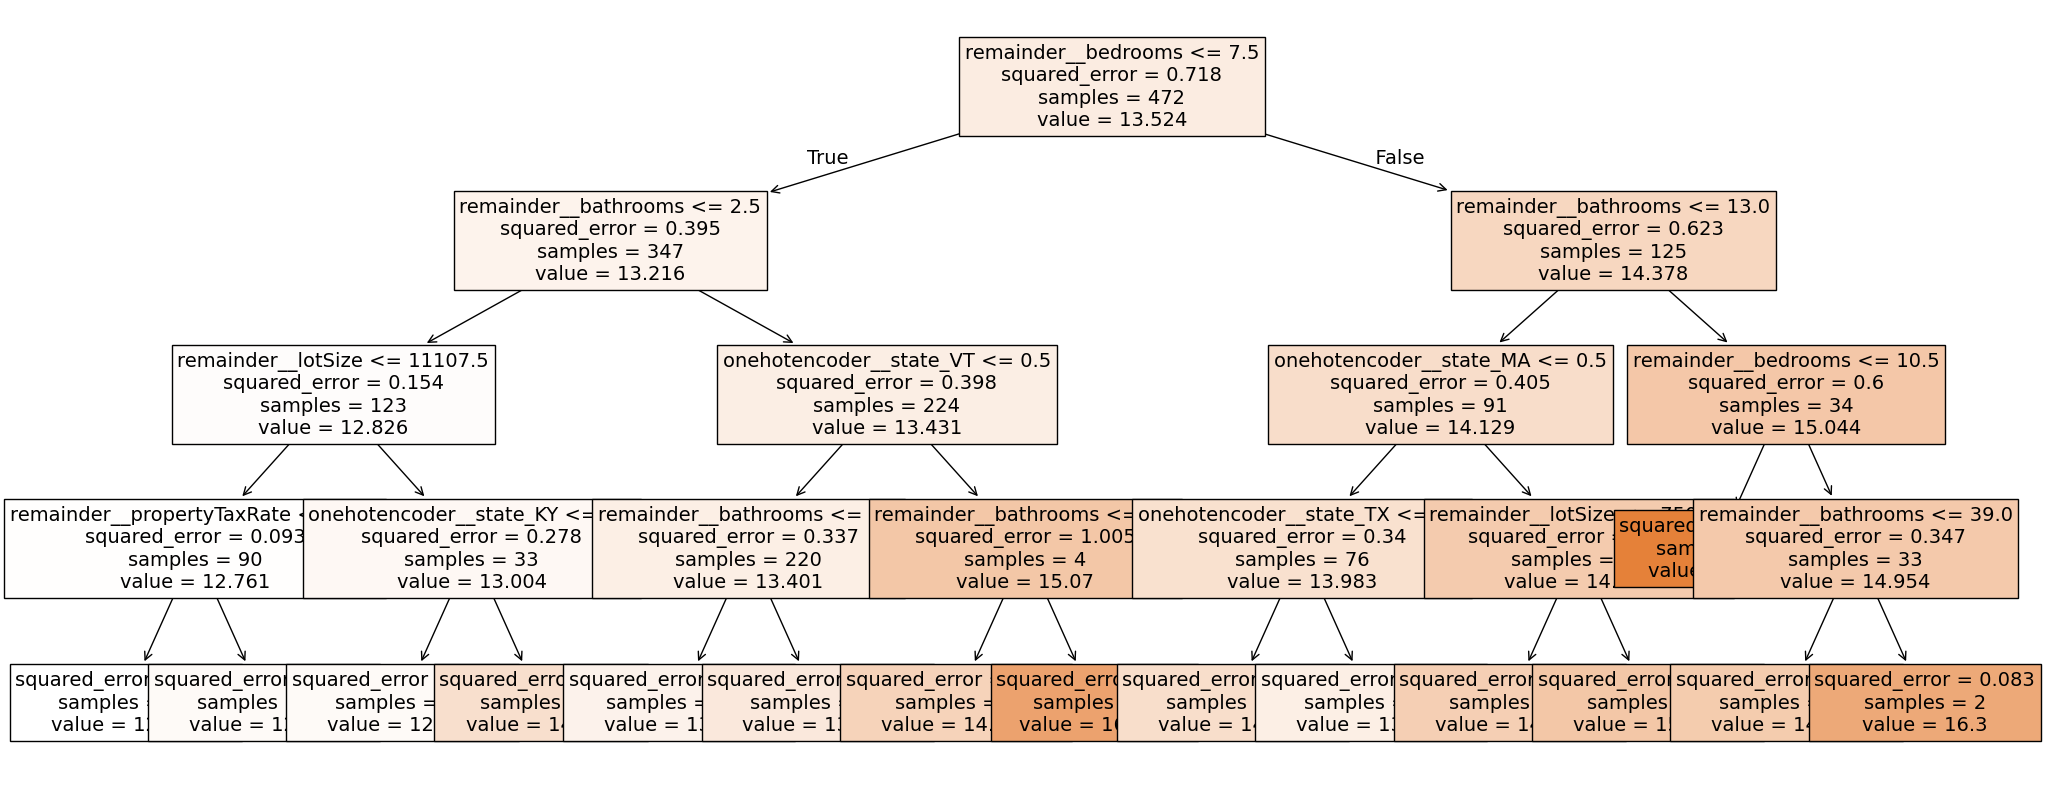

In [123]:
# plotting the tree
plt.figure(figsize=(25, 10))
plot_tree(dt, filled=True, feature_names=transformer.get_feature_names_out().tolist(), fontsize=14);

In [124]:
# mse for train data
y_train_preds = dt.predict(x_train_encoded)
mean_squared_error(y_train, y_train_preds)

0.23141230820294684

In [125]:
# mse for test data
y_test_preds = dt.predict(x_test_encoded)
mean_squared_error(y_test, y_test_preds)


0.14243706339243353

In [126]:
# feature importance
r = permutation_importance(dt, x_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = transformer.get_feature_names_out().tolist())

,0
onehotencoder__state_IA,0.000000
onehotencoder__state_IL,0.000000
onehotencoder__state_KY,0.017870
onehotencoder__state_MA,0.021839
onehotencoder__state_ME,0.000000
onehotencoder__state_MN,0.000000
onehotencoder__state_MO,0.000000
onehotencoder__state_MS,0.000000
onehotencoder__state_MT,0.000000
onehotencoder__state_NC,0.000000


# Random forest Regression Model


In [127]:
# creating X & y, splitting into training and testing data
X = housing_data[['state', 'bedrooms','bathrooms','yearBuilt', 'lotSize','propertyTaxRate','propertyTypeDimension']]
y = housing_data['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [128]:
# encoding categorical columns
cat_col = ['state', 'propertyTypeDimension']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [129]:
# pipeline for the random forest model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [130]:
# defining the grid of parameters
paramgrid = {'model__n_estimators': [50, 100, 150, 200], 'model__max_depth': [3, 4, 5, 6]}

In [131]:
# performing gridsearch wtih cross validation
grid = GridSearchCV(pipe, paramgrid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['state',
                                                                          'propertyTypeDimension'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [132]:
# best parameters
grid.best_params_

{'model__max_depth': 3, 'model__n_estimators': 50}

In [133]:
# use max depth of 3 & 50 estimators in model
rf = grid.best_estimator_

In [134]:
# mse for train data
y_train_preds = rf.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.235226246108937

In [135]:
# mse for test data
y_test_preds = rf.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.17658007488783883

In [136]:
# feature importance
r = permutation_importance(rf, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
state,0.047290
bedrooms,0.205296
bathrooms,0.678542
yearBuilt,0.000522
lotSize,0.028711
propertyTaxRate,0.009119
propertyTypeDimension,0.000000


# Best:  Decision Tree with height 4 (see if description has an effect on the housing prices)

In [137]:
housing_data.head()

,state,homeStatus,bedrooms,bathrooms,price,yearBuilt,lotSize,propertyTaxRate,description,propertyTypeDimension,LogPrice
0,ME,FOR_SALE,6.0,6.0,1500000,2017,164221.0,0.95,"This exceptional property, set on approximatel...",Multi Family,14.220976
1,ME,FOR_SALE,6.0,3.0,740000,2024,22651.0,1.04,We are pleased to present this newly construct...,Multi Family,13.514405
2,ME,FOR_SALE,5.0,4.0,999000,2017,105850.0,0.97,"Welcome to 51 Delta Drive, a stunning 4001 sq....",Multi Family,13.814510
3,ME,FOR_SALE,4.0,2.0,379999,2021,31363.0,1.22,This duplex is truly one of a kind. Built to ...,Multi Family,12.847924
4,ME,FOR_SALE,4.0,2.0,399900,2017,8712.0,1.04,"Welcome to 15 Murray st, a beautifully appoint...",Multi Family,12.898970


In [138]:
# sentiment analysis

# Define the function to get polarity
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply the functions to the DESCRIPTION column
housing_data['Polarity'] = housing_data['description'].apply(get_polarity)

In [139]:
housing_data[['description', 'Polarity']]

,description,Polarity
0,"This exceptional property, set on approximatel...",0.419697
1,We are pleased to present this newly construct...,0.282517
2,"Welcome to 51 Delta Drive, a stunning 4001 sq....",0.212851
3,This duplex is truly one of a kind. Built to ...,0.353968
4,"Welcome to 15 Murray st, a beautifully appoint...",0.348789
...,...,...
995,Welcome to the HISTORIC District of Elmwood! 1...,0.194219
996,Great opportunity to own a brand-new two-famil...,0.269740
997,This two-unit property is located only 15 minu...,0.199802
998,This two-family home offers a fantastic invest...,0.236667


In [140]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  591 non-null    object 
 1   homeStatus             591 non-null    object 
 2   bedrooms               591 non-null    float64
 3   bathrooms              591 non-null    float64
 4   price                  591 non-null    int64  
 5   yearBuilt              591 non-null    int64  
 6   lotSize                591 non-null    float64
 7   propertyTaxRate        591 non-null    float64
 8   description            591 non-null    object 
 9   propertyTypeDimension  591 non-null    object 
 10  LogPrice               591 non-null    float64
 11  Polarity               591 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 60.0+ KB


In [141]:
# using sentiment analysis on the best performed model (Decision tree with height 4) to see if description has an effect
X = housing_data[['state', 'bedrooms','bathrooms','yearBuilt', 'lotSize','propertyTaxRate','propertyTypeDimension', 'Polarity']]
y = housing_data['LogPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
cat_col = ['state', 'propertyTypeDimension']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')
x_train_encoded = transformer.fit_transform(X_train)
x_test_encoded = transformer.transform(X_test)

In [142]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(x_train_encoded, y_train)

DecisionTreeRegressor(max_depth=4)

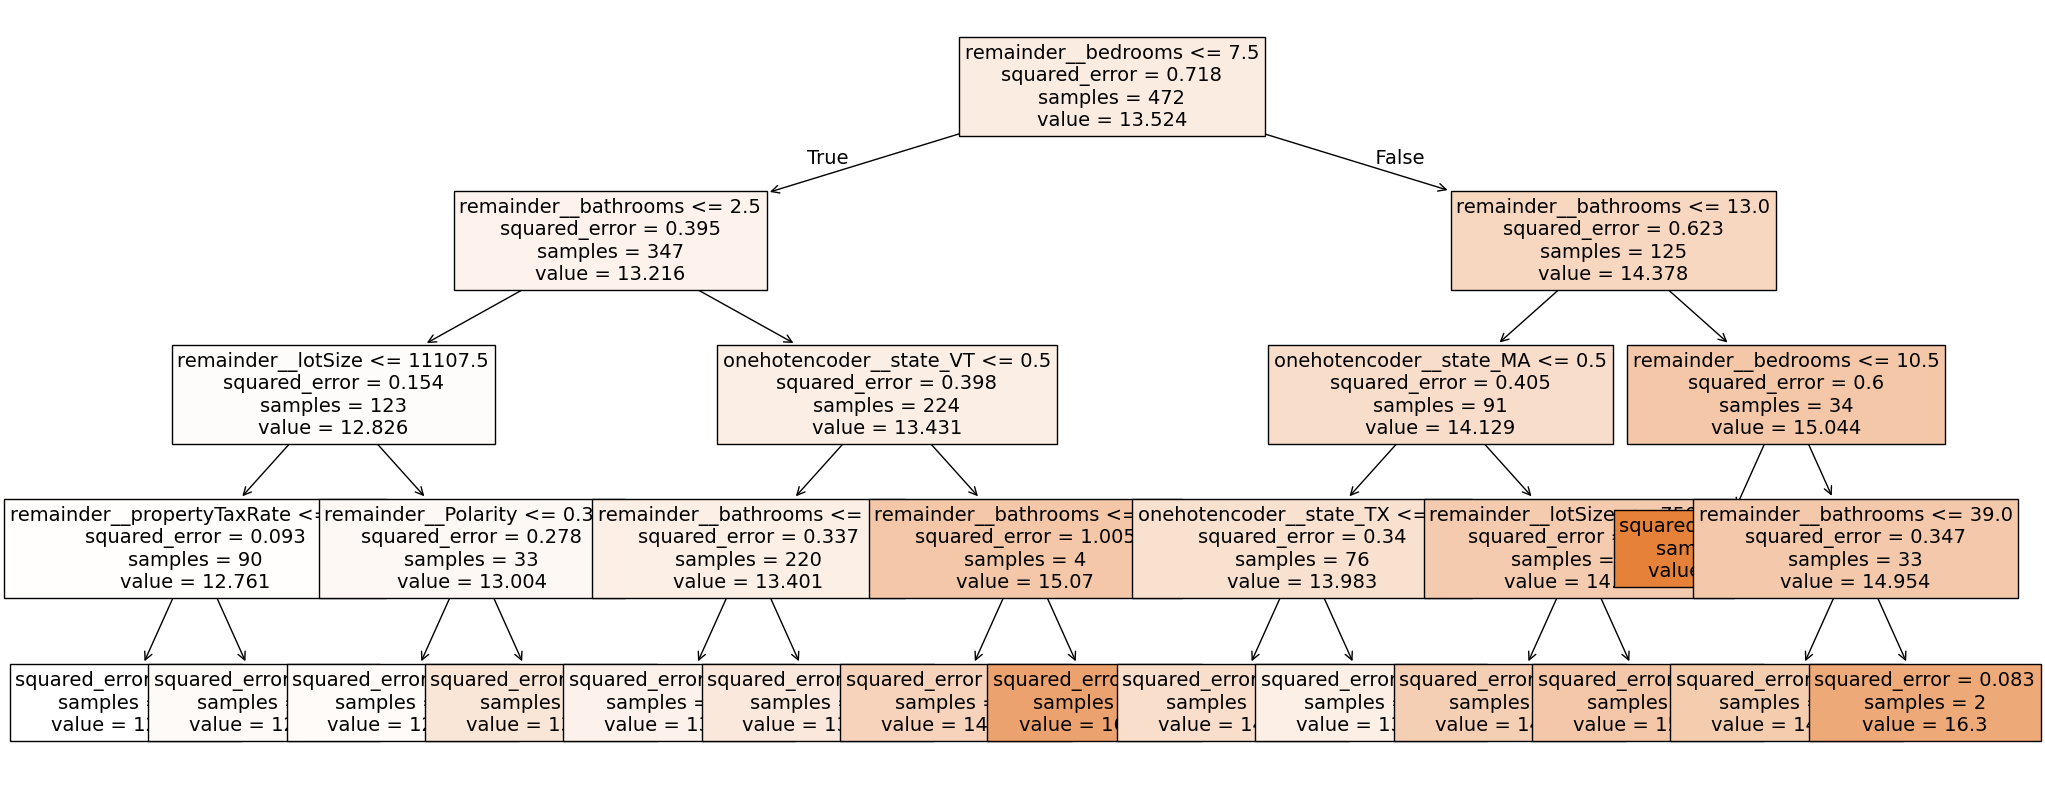

In [143]:
# plotting the tree
plt.figure(figsize=(25, 10))
plot_tree(dt, filled=True, feature_names=transformer.get_feature_names_out().tolist(), fontsize=14);

In [144]:
# mse for train data
y_train_preds = dt.predict(x_train_encoded)
mean_squared_error(y_train, y_train_preds)

0.23048775345745942

In [145]:
# mse for test data
y_test_preds = dt.predict(x_test_encoded)
mean_squared_error(y_test, y_test_preds)

0.1531180959266256